In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
#https://finance.yahoo.com/quote/ETH-EUR/history?p=ETH-EUR
bitcoin= pd.read_csv('BTC-EUR.csv',index_col='Date',parse_dates=True)
Ethereum=pd.read_csv('ETH-EUR.csv',index_col='Date',parse_dates=True)

In [128]:
Ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.592821,3.231847,2.299453,2.526771,2.526771,149784
2015-08-08,2.546495,2.551098,0.651468,0.686651,0.686651,614518
2015-08-09,0.643639,0.801941,0.573504,0.640651,0.640651,485733
2015-08-10,0.651688,0.662660,0.579996,0.643283,0.643283,368004
2015-08-11,0.642956,1.024735,0.604369,0.967177,0.967177,1325151


In [129]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,264.909882,264.909882,259.871704,260.010742,260.010742,6649470
2015-01-02,259.870117,263.177216,259.896393,262.548553,262.548553,6551087
2015-01-03,262.393555,262.646881,234.254517,234.254517,234.254517,27547628
2015-01-04,234.307861,239.378296,214.694565,221.157715,221.157715,46567135
2015-01-05,221.901901,232.746048,221.623627,229.935501,229.935501,36829019


<function matplotlib.pyplot.show(close=None, block=None)>

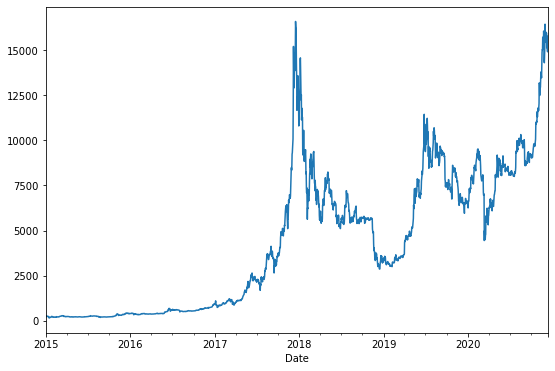

In [130]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

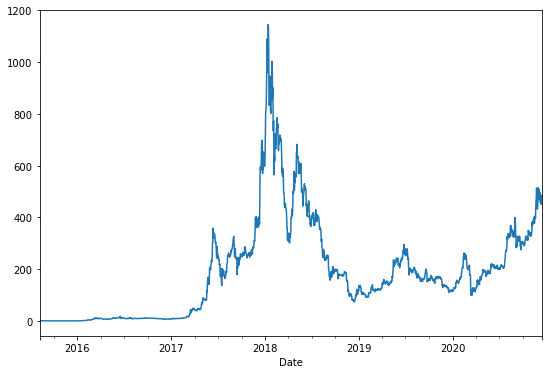

In [140]:
Ethereum['Close'].plot(figsize=(9,6))
plt.show

In [131]:
bitcoin.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14'],
              dtype='datetime64[ns]', name='Date', length=2175, freq=None)

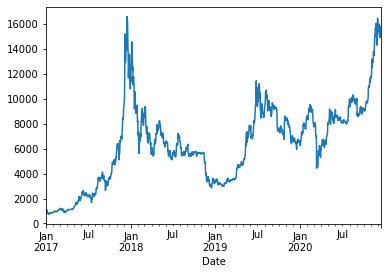

In [132]:
bitcoin.loc['2017':'2020']['Close'].plot()
plt.show()

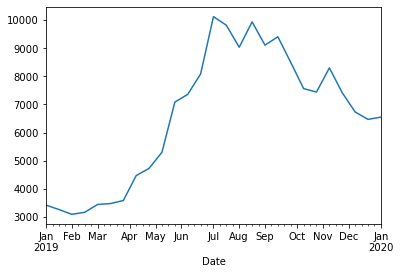

In [133]:
bitcoin.loc['2019','Close'].resample('2W').mean().plot()
plt.show()

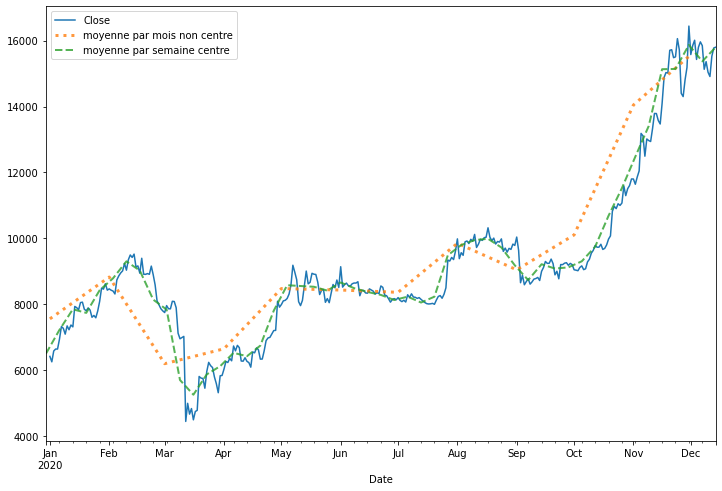

In [134]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020','Close'].plot()
bitcoin.loc['2020','Close'].resample('M').mean().plot(label='moyenne par mois non centre',lw=3,ls=':',alpha=0.8)
bitcoin.loc['2020','Close'].resample('W').mean().plot(label='moyenne par semaine centre',lw=2,ls='--',alpha=0.8)
plt.legend()
plt.show()

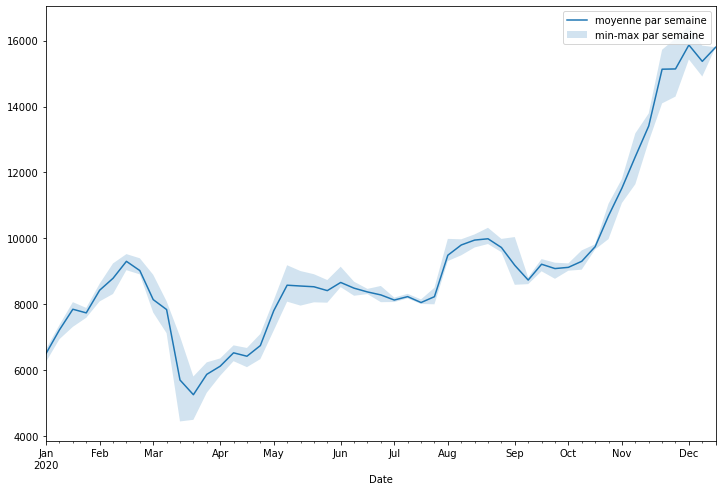

In [135]:
m=bitcoin.loc['2020','Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
m['mean']['2020'].plot(label='moyenne par semaine')
plt.fill_between(m.index,m['max'],m['min'], alpha=0.2,label='min-max par semaine')
plt.legend()
plt.show()

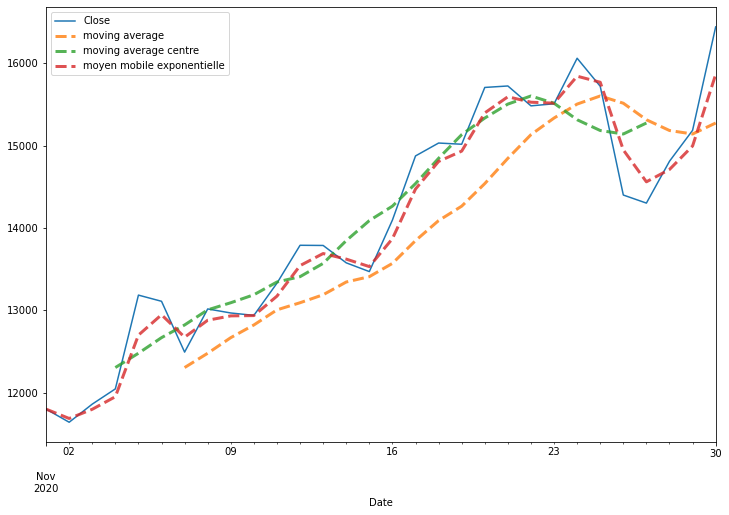

In [138]:
plt.figure(figsize=(12,8))
bitcoin.loc['2020-11','Close'].plot()
bitcoin.loc['2020-11','Close'].rolling(window=7).mean().plot(label='moving average',lw=3,ls='--',alpha=0.8)
bitcoin.loc['2020-11','Close'].rolling(window=7,center=True).mean().plot(label='moving average centre',lw=3,ls='--',alpha=0.8)
bitcoin.loc['2020-11','Close'].ewm(alpha=0.6).mean().plot(label='moyen mobile exponentielle',lw=3,ls='--',alpha=0.8)
plt.legend()
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

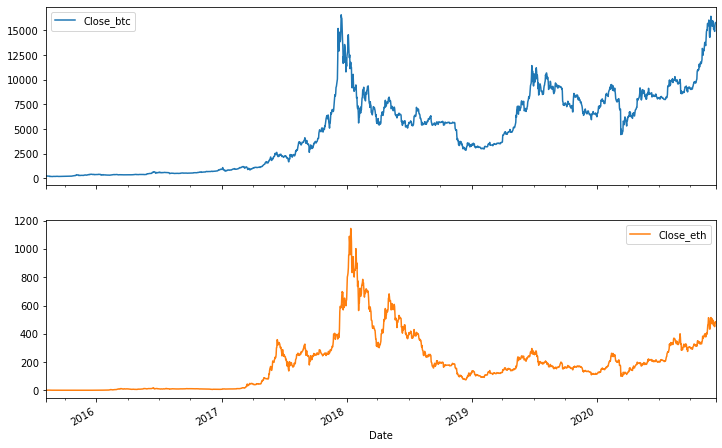

In [147]:
btc_eth=pd.merge(bitcoin,Ethereum,on='Date',how='inner',suffixes=('_btc','_eth'))
btc_eth[['Close_btc','Close_eth']].plot(subplots=True,figsize=(12,8))

In [148]:
correlations=btc_eth[['Close_btc','Close_eth']].corr()

<AxesSubplot:>

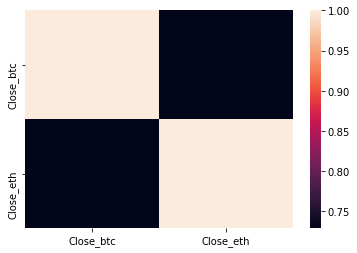

In [151]:
import seaborn as sns
sns.heatmap(correlations)

<AxesSubplot:xlabel='Date'>

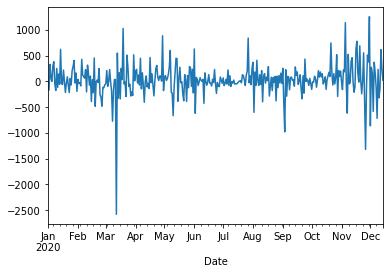

In [152]:
bitcoin['Close']['2020'].diff().plot()

<AxesSubplot:xlabel='Date'>

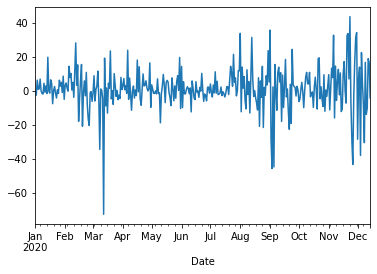

In [153]:
Ethereum['Close']['2020'].diff().plot()